Chatbot with tool capabilities from arxiv ,wikipedia Search,Internet Search like Google
 and some custom tool functions 

In [7]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper

In [8]:
import sys
print(sys.executable)

c:\Users\Mohamed Arshad\Projects\agents\.venv\Scripts\python.exe


In [9]:
# Arxiv 
arxiv = ArxivQueryRun(api_wrapper=ArxivAPIWrapper(doc_content_chars_max=5000))

In [10]:
arxiv.invoke('Attention is all you need')

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifically, we replace the attention layer in a vision transformer with a feed-forward layer applied over the patch dimension. The resulting architecture is simply a series of feed-forward layers applied over the patch and feature dimensions in an alternating fashion. In experiments on ImageNet, this architecture performs surprisingly well: a ViT/DeiT-base-sized model obtains 74.9\\% top-1 accuracy, compared to 77.9\\% and 79.9\\% for ViT and DeiT respectively. These results indicate that aspects

In [11]:
# wikipedia
wikipedia =WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500))


In [12]:
wikipedia.run('Langgraph')

"Page: LangChain\nSummary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis."

In [13]:
import os
from dotenv import load_dotenv

os.environ['GROQ_API_KEY'] =os.getenv('GROQ_API_KEY')
os.environ['TAVILY_API_KEY'] =os.getenv('TAVILY_API_KEY')

In [14]:
# Tavily Search Tool-> Internet Search tool
from langchain_tavily import TavilySearch

tavily = TavilySearch(
    max_results=5,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

c:\Users\Mohamed Arshad\Projects\agents\.venv\Lib\site-packages\pydantic\_internal\_fields.py:198: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  warnings.warn(
c:\Users\Mohamed Arshad\Projects\agents\.venv\Lib\site-packages\pydantic\_internal\_fields.py:198: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  warnings.warn(


In [15]:
tavily.invoke("recent ai news on 12 jan 2026")

{'query': 'recent ai news on 12 jan 2026',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.theguardian.com/media/2026/jan/12/publishers-fear-ai-search-summaries-and-chatbots-mean-end-of-traffic-era',
   'title': "Publishers fear AI search summaries and chatbots mean 'end of ...",
   'content': 'Mon 12 Jan 2026 01.00 EST. Share. Media companies expect web traffic to their sites from online searches to plummet over the next three years, as AI',
   'score': 0.83710164,
   'raw_content': None},
  {'url': 'https://www.fool.com/investing/2026/01/12/a-once-in-a-decade-investment-opportunity-the-best/',
   'title': 'The Best Artificial Intelligence (AI) Stock to Buy in 2026',
   'content': 'A Once-in-a-Decade Investment Opportunity: The Best Artificial Intelligence (AI) Stock to Buy in 2026. By Adam Spatacco – Jan 12, 2026 at 7:45AM',
   'score': 0.8058924,
   'raw_content': None},
  {'url': 'https://www.clickondetroit.com/news/local/2026/01/12/s

In [16]:
# Combine all tools
tools =[arxiv,wikipedia,tavily]

In [17]:
# Initialize chat model
from langchain_groq import ChatGroq

llm =ChatGroq(model = 'llama-3.1-8b-instant')

In [18]:
llm.invoke('hey there')

AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 37, 'total_tokens': 60, 'completion_time': 0.072355469, 'completion_tokens_details': None, 'prompt_time': 0.002775943, 'prompt_tokens_details': None, 'queue_time': 0.089765765, 'total_time': 0.075131412}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bb2b9-1821-7e21-b855-83f6b15f8a15-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 37, 'output_tokens': 23, 'total_tokens': 60})

In [19]:
# this is mandate
llm_with_tools=llm.bind_tools(tools)

In [20]:
# check whether llm is calling the right tool when needed
from langchain_core.messages import HumanMessage,AIMessage

llm_with_tools.invoke([HumanMessage(content="what is attention is all you need ?")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9k5fjg336', 'function': {'arguments': '{"query":"Attention is All You Need"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 1959, 'total_tokens': 1978, 'completion_time': 0.028640443, 'completion_tokens_details': None, 'prompt_time': 0.176879993, 'prompt_tokens_details': None, 'queue_time': 0.124969747, 'total_time': 0.205520436}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bb2b9-1abf-7393-bf83-932a50d4bcd2-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'Attention is All You Need'}, 'id': '9k5fjg336', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 1959, 'output_tokens': 19, 'total_tokens': 1978})

In [21]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition
from IPython.display import Image,display
from langgraph.graph.message import AnyMessage,add_messages
from typing import TypedDict,Annotated


In [22]:
# Defining State Schema 
# Define the State of the Graph
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [23]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

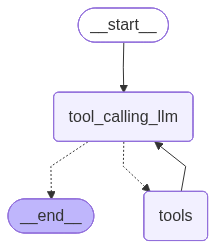

In [29]:
# Initialize state Graph
graph = StateGraph(State)

# add nodes
graph.add_node('tool_calling_llm',tool_calling_llm)
graph.add_node('tools',ToolNode(tools))

# add edges
graph.add_edge(START,'tool_calling_llm')
graph.add_conditional_edges('tool_calling_llm',tools_condition)
graph.add_edge('tools','tool_calling_llm')

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [31]:
from langchain_core.messages import SystemMessage

system_prompt = SystemMessage(
    content="""
You are a research assistant.
- Use Arxiv for original papers
- Use Tavily for recent information
- Use multiple tools if needed
"""
)


In [33]:
import gradio as gr

"""from langchain_core.messages import HumanMessage

def chat(user_input,history):
    result =graph_builder.invoke({"messages":[system_prompt,HumanMessage(content=user_input)]})
    print(result)
    return result['messages'][-1].content

gr.ChatInterface(chat,type="messages").launch()"""


'from langchain_core.messages import HumanMessage\n\ndef chat(user_input,history):\n    result =graph_builder.invoke({"messages":[system_prompt,HumanMessage(content=user_input)]})\n    print(result)\n    return result[\'messages\'][-1].content\n\ngr.ChatInterface(chat,type="messages").launch()'

In [34]:
from langchain_core.messages import AIMessage, ToolMessage

def debug_event_printer(event):
    for node, state in event.items():
        print(f"\n🔹 NODE: {node}")

        messages = state.get("messages", [])
        last = messages[-1] if messages else None

        if isinstance(last, AIMessage):
            # LLM step
            print("🤖 LLM OUTPUT:")
            print(last.content)

            if last.tool_calls:
                print("🛠 TOOL CALLS:")
                for tc in last.tool_calls:
                    print(f"  → Tool: {tc['name']}")
                    print(f"    Args: {tc['args']}")

        elif isinstance(last, ToolMessage):
            print("🔧 TOOL OUTPUT:")
            print(last.content)


In [37]:
import gradio as gr
from langchain_core.messages import HumanMessage

def chat(user_input, history):
    inputs = {
        "messages": [system_prompt, HumanMessage(content=user_input)]
    }

    print("\n================ NEW QUERY ================\n")

    last_messages = None

    for event in graph_builder.stream(inputs):
        debug_event_printer(event)

        # event = {"node_name": {"messages": [...]}}
        node_state = list(event.values())[0]
        if "messages" in node_state:
            last_messages = node_state["messages"]

    print("\n=============== FINAL ANSWER ===============\n")

    return last_messages[-1].content


In [ ]:
gr.ChatInterface(chat, type="messages").launch()


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.



================ NEW QUERY ================


🔹 NODE: tool_calling_llm
🤖 LLM OUTPUT:

🛠 TOOL CALLS:
  → Tool: arxiv
    Args: {'query': 'BERT paper abstract and main idea'}
  → Tool: tavily_search
    Args: {'query': 'BERT paper abstract and main idea', 'start_date': '2020-11-01', 'topic': 'news'}

🔹 NODE: tools
🔧 TOOL OUTPUT:
{"query": "BERT paper abstract and main idea", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.facebook.com/groups/nichesitemasteryclub/posts/1320819518542841/", "title": "What are the key advantages of the bert model in NLP?", "content": "The Core Idea of the Paper The paper's central idea is that attention mechanisms are sufficient for handling sequence-to-sequence tasks, such as machine", "score": 0.9990601, "raw_content": null}, {"url": "https://dl.acm.org/doi/10.1145/3746709.3746721", "title": "Research and Implementation of Text Classification Based ...", "content": "Abstract. This paper focuses on automatic text